## Importing The Packages

In [320]:
#Used Python 3 environment  with many helpful analytics libraries installed
## Importing the primary libraries I'll uses for the analysis
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from dateutil.relativedelta import *
sns.set_theme(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Objectives
* Use Stackoverlow posts to derive insights from the data
* Create visualizations for Understanding the distribution of 5 different metrics between the posts of the two tags
* Create visualizations for Understanding the Trend of 5 different metrics over 6 months on  a weekly basis

### Dates Considered

* Jan 1, 2021 - July 1, 2021

### Tags Considered
* wordpress
* drupal

In [276]:
wordpress=pd.read_csv('db/wordpress.csv')
drupal=pd.read_csv('db/drupal.csv')

In [277]:
wordpress.head(5)

,id,creation_date,tags,answer_count,comment_count,favorite_count,view_count,score
0,67590725,2021-05-18 16:56:14.547000+00:00,wordpress|image|plugins|pageload|photography,0,0,NaN,4,0
1,67381062,2021-05-04 08:15:32.727000+00:00,php|wordpress,0,0,NaN,5,0
2,67404631,2021-05-05 15:50:54.797000+00:00,html|wordpress|plugins,0,0,NaN,5,0
3,67572667,2021-05-17 15:27:49.177000+00:00,wordpress|slider,0,0,NaN,5,0
4,67448500,2021-05-08 14:14:55.063000+00:00,wordpress|authentication,0,0,NaN,6,0


In [278]:
drupal.head(5)

,id,creation_date,tags,answer_count,comment_count,favorite_count,view_count,score
0,68089496,2021-06-22 19:09:26.763000+00:00,drupal|roles|drupal-5,0,0,NaN,5,0
1,68186414,2021-06-29 22:34:12.097000+00:00,drupal|dialog,0,0,NaN,9,0
2,68186139,2021-06-29 21:58:20.383000+00:00,javascript|html|reactjs|drupal|google-visualiz...,0,0,NaN,12,0
3,68158409,2021-06-28 06:17:48.017000+00:00,javascript|css|web|drupal,1,0,NaN,20,0
4,68075028,2021-06-21 21:38:50.610000+00:00,drupal|drupal-8|drupal-modules|migrate,0,0,NaN,23,0


### Data Pre-Processing
* Fill NaN Values with 0 for favorite_count

In [279]:
wordpress['favorite_count']=wordpress['favorite_count'].fillna(0).astype('int64')
drupal['favorite_count']=drupal['favorite_count'].fillna(0).astype('int64')

## Task 1 

## Generate Shaded Density Plots with Rug Plot to understand the differences in distribution of the 5 metrics between the posts of the two tags

### Metrics to Potentially Use
* Answer Count
* Comment Count
* Favorite Count
* View Count        
* Score

A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation (kde). In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point). 

To make density plots in seaborn, we can use either the distplot or kdeplot function. I will continue to use the distplot function because it lets us make multiple distributions with one function call. To show the distributions of wordpress and drupal tags on the same plot for a particular metric,each time we call distplot with the kernel density estimate set to True and the histogram set to False. 

Filling in the density plot can help us to distinguish between overlapping distributions. Although this is not always a good approach, it can help to emphasize the difference between distributions. To shade the density plots, we pass in shade = True to the kde_kws argument in the distplot call. Whether or not to shade the plot is, like other plotting options, a question that depends on the problem! For this graph, I think it makes sense because the shading helps us distinguish the plots in the regions where they overlap.

If you want to show every value in a distribution and not just the smoothed density, you can add a rug plot. This shows every single data point on the x-axis, allowing us to visualize all of the actual values. The benefit of using seaborn’s distplot is that we can add the rug plot with a single parameter call of rug = True (with some formatting as well).

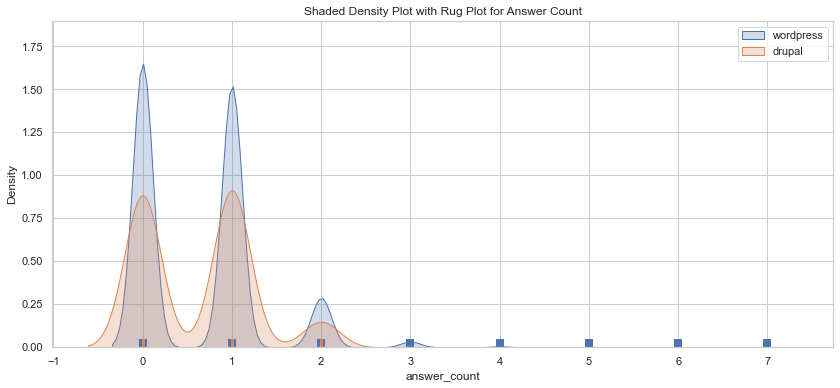

In [321]:
plt.figure(figsize=(14,6))
sns.distplot(wordpress['answer_count'],label='wordpress',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 8})
sns.distplot(drupal['answer_count'],label='drupal',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 3})
plt.legend(loc='best')
plt.title('Shaded Density Plot with Rug Plot for Answer Count')
plt.savefig('Shaded Density Plot with Rug Plot for Answer Count.jpg')
plt.show()

#### Conclusion
With the density plot for answer count, we come to the conclusion that wordpress tag conatin higher density of answer count distributions compared to drupal tag

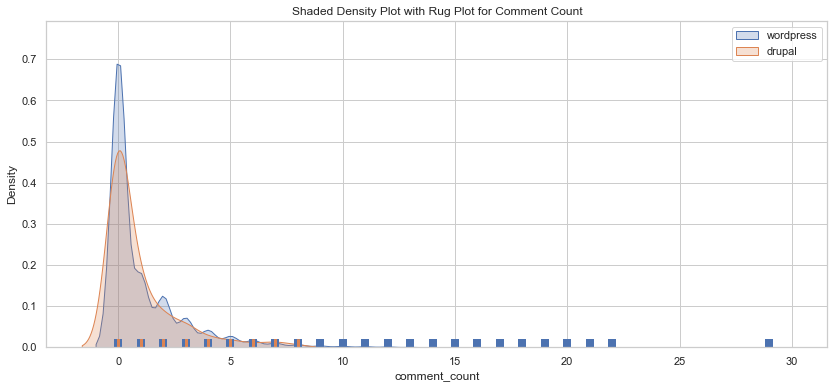

In [322]:
plt.figure(figsize=(14,6))
sns.distplot(wordpress['comment_count'],label='wordpress',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 8})
sns.distplot(drupal['comment_count'],label='drupal',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 3})
plt.legend(loc='best')
plt.title('Shaded Density Plot with Rug Plot for Comment Count')
plt.savefig('Shaded Density Plot with Rug Plot for Comment Count.jpg')
plt.show()

#### Conclusion
With the density plot for comment count, we come to the conclusion that wordpress tag conatin higher density of comment count distributions compared to drupal tag

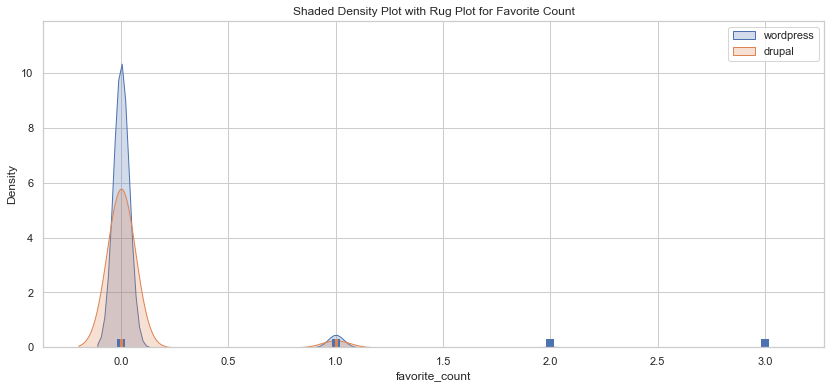

In [323]:
plt.figure(figsize=(14,6))
sns.distplot(wordpress['favorite_count'],label='wordpress',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 8})
sns.distplot(drupal['favorite_count'],label='drupal',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 3})
plt.legend(loc='best')
plt.title('Shaded Density Plot with Rug Plot for Favorite Count')
plt.savefig('Shaded Density Plot with Rug Plot for Favorite Count.jpg')
plt.show()

#### Conclusion
With the density plot for Favorite count, we come to the conclusion that wordpress tag conatin higher density of favorite count distributions compared to drupal tag

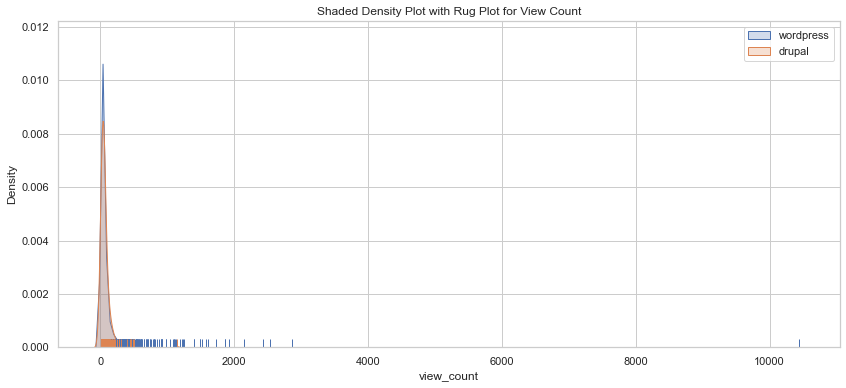

In [324]:
plt.figure(figsize=(14,6))
sns.distplot(wordpress['view_count'],label='wordpress',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 1})
sns.distplot(drupal['view_count'],label='drupal',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 1})
plt.legend(loc='best')
plt.title('Shaded Density Plot with Rug Plot for View Count')
plt.savefig('Shaded Density Plot with Rug Plot for View Count.jpg')
plt.show()

#### Conclusion
With the density plot for view count, we come to the conclusion that wordpress tag conatin higher density of view count distributions compared to drupal tag

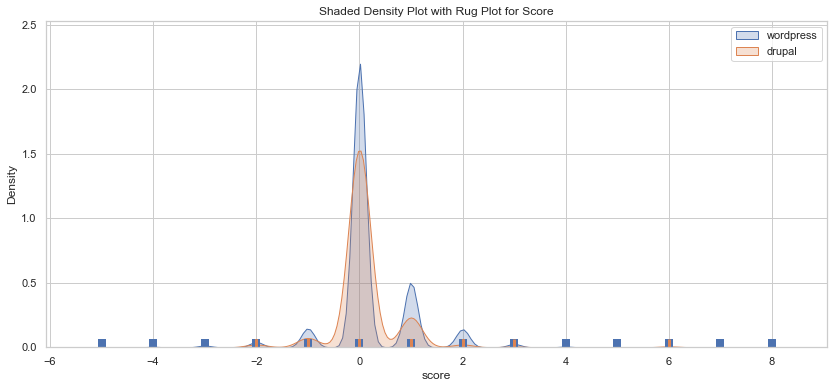

In [325]:
plt.figure(figsize=(14,6))
sns.distplot(wordpress['score'],label='wordpress',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 8})
sns.distplot(drupal['score'],label='drupal',kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 1},rug = True,rug_kws={'linewidth': 3})
plt.legend(loc='best')
plt.title('Shaded Density Plot with Rug Plot for Score')
plt.savefig('Shaded Density Plot with Rug Plot for Score.jpg')
plt.show()

#### Conclusion
With the density plot for Score, we come to the conclusion that wordpress tag conatin higher density of Score distributions compared to drupal tag

## Task 2

## Generate Time Series Plots to understand the topical trend of the 5 metrics over the given period between the posts of the two tags

To reflect the trend over the 6 months (Jan 2021 to June 2021) for the 5 metrics, a sliding time window schema has been used. The window is fixed to be 7-day long where the sum of metric values of each tag is computed. The window starts from 01-01-2021 and move 7 days forward at a time until it reaches 01-07-2021. The topical trend obtained by this method is shown below for the various metrics.


In [353]:
tag_list = ['wordpress', 'drupal']
result = pd.DataFrame()
date_string_list = []
for tag in tag_list:
    start_date = datetime.datetime(2021,1,1)
    end_date = datetime.datetime(2021,1,7)
    final_date = datetime.datetime(2021,7,1)
    temp = []
    while end_date <= final_date:
        start_date_string = start_date.strftime('%Y-%m-%d')
        end_date_string = end_date.strftime('%Y-%m-%d')
        date_string_list.append(start_date_string+" : "+end_date_string)
        if tag =='wordpress':
            temp.append(wordpress[(wordpress['creation_date'] >= start_date_string) & (wordpress['creation_date'] <= end_date_string)].count()[0])
        if tag =='drupal':
            temp.append(drupal[(drupal['creation_date'] >= start_date_string) & (drupal['creation_date'] <= end_date_string)].count()[0])
        start_date += relativedelta(days=+7)
        end_date += relativedelta(days=+7)
    result[tag] = temp
result.index = date_string_list[:len(date_string_list) // len(tag_list)]
result.fillna(0,inplace=True)
result=result.astype('int64')

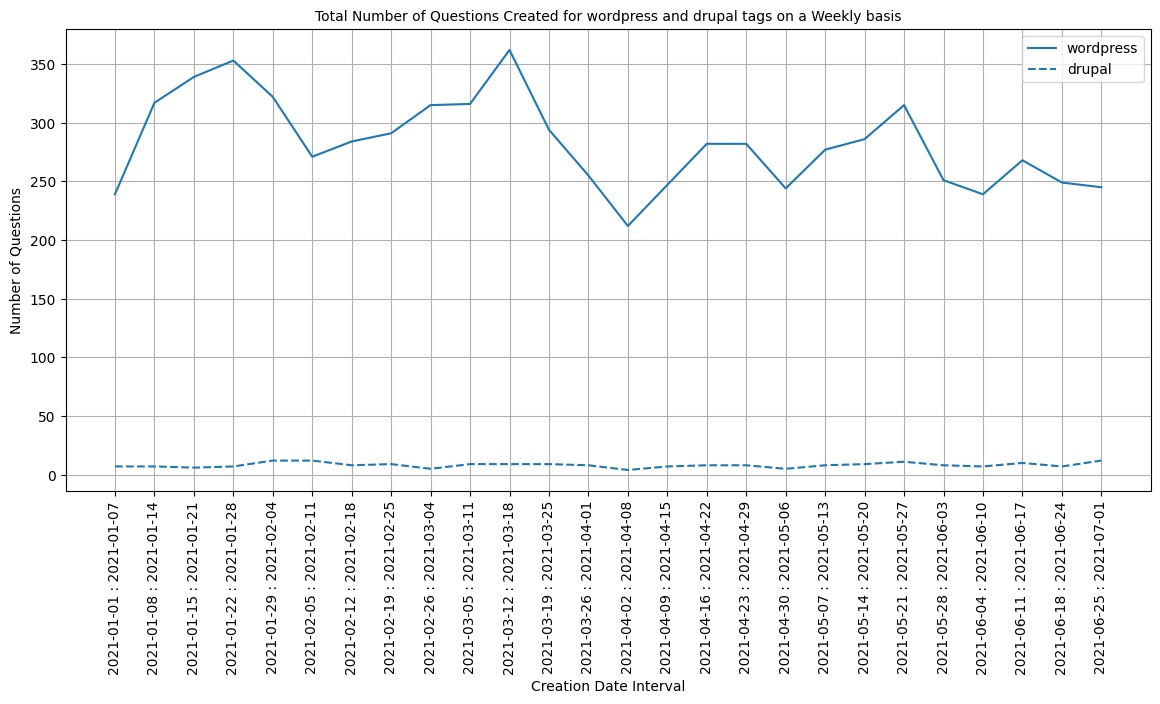

In [354]:
# Plot the  trend

matplotlib.style.use('default')
labelsize = 10
tag_list = result.columns.tolist()
x = result.index.tolist()

NUM_COLORS = len(tag_list)
LINE_STYLES = ['solid', 'dashed']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(14, 6)
for i in range(NUM_COLORS):
    lines = ax.plot(x,result[tag_list[i]],label=tag_list[i])
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.legend(fontsize=10)
plt.grid(True)
plt.title("Total Number of Questions Created for wordpress and drupal tags on a Weekly basis", fontsize=labelsize)
plt.xlabel('Creation Date Interval',fontsize = labelsize)
plt.ylabel('Number of Questions',fontsize = labelsize)
plt.show()
# plt.savefig('Questions trend of 2 tags.jpg')

#### Conclusion
Based on the graph above, Wordpress has been receiving higher number of Questions over the 6 months compared to Drupal. Thus, Wordpress is the more popular tag. For Wordpress, strong peaks are observed from Jan to March in 2021 and after that the peakedness in spikes gradually decreased. For drupal, the trend is steady over the given duration with its relative number remaining less than 50.

In [355]:
tag_list = ['wordpress', 'drupal']
result = pd.DataFrame()
date_string_list = []
for tag in tag_list:
    start_date = datetime.datetime(2021,1,1)
    end_date = datetime.datetime(2021,1,7)
    final_date = datetime.datetime(2021,7,1)
    temp = []
    while end_date <= final_date:
        start_date_string = start_date.strftime('%Y-%m-%d')
        end_date_string = end_date.strftime('%Y-%m-%d')
        date_string_list.append(start_date_string+" : "+end_date_string)
        if tag =='wordpress':
            temp.append(wordpress[(wordpress['creation_date'] >= start_date_string) & (wordpress['creation_date'] <= end_date_string)]['answer_count'].sum())
        if tag =='drupal':
            temp.append(drupal[(drupal['creation_date'] >= start_date_string) & (drupal['creation_date'] <= end_date_string)]['answer_count'].sum())
        start_date += relativedelta(days=+7)
        end_date += relativedelta(days=+7)
    result[tag] = temp
result.index = date_string_list[:len(date_string_list) // len(tag_list)]
result.fillna(0,inplace=True)
result=result.astype('int64')

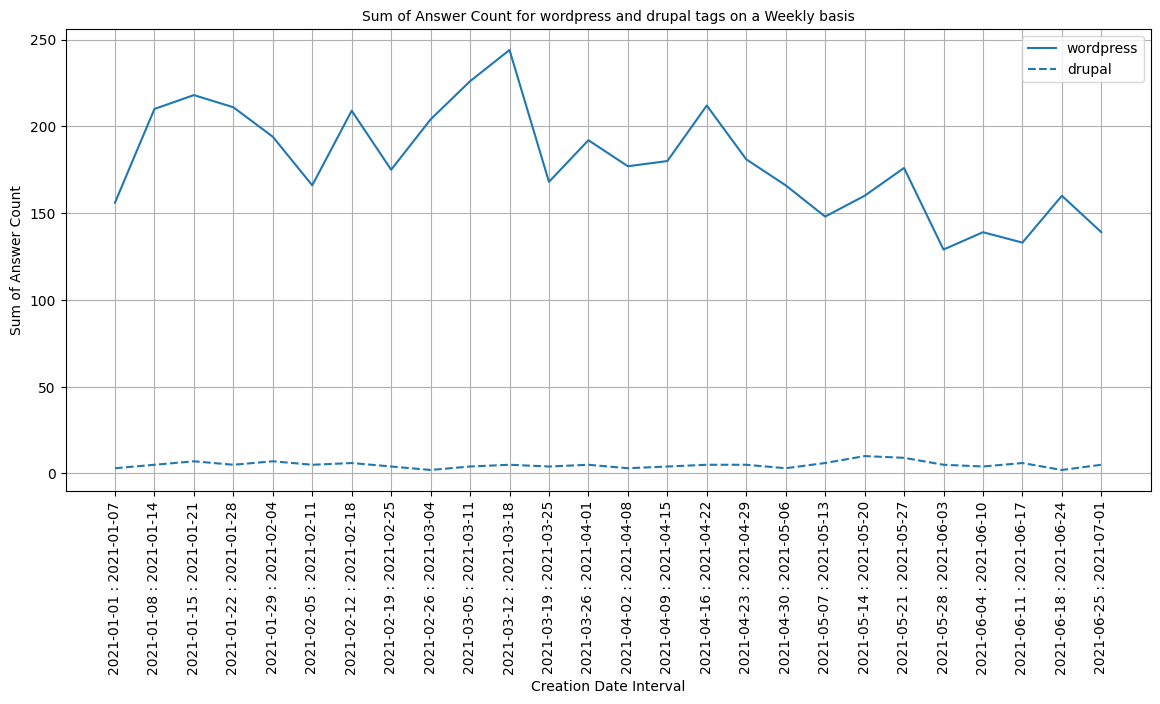

In [356]:
# Plot the  trend

matplotlib.style.use('default')
labelsize = 10
tag_list = result.columns.tolist()
x = result.index.tolist()

NUM_COLORS = len(tag_list)
LINE_STYLES = ['solid', 'dashed']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(14, 6)
for i in range(NUM_COLORS):
    lines = ax.plot(x,result[tag_list[i]],label=tag_list[i])
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.legend(fontsize=10)
plt.grid(True)
plt.title("Sum of Answer Count for wordpress and drupal tags on a Weekly basis", fontsize=labelsize)
plt.xlabel('Creation Date Interval',fontsize = labelsize)
plt.ylabel('Sum of Answer Count',fontsize = labelsize)
plt.show()
# plt.savefig('Answer Count Trend of 2 tags.jpg')

Based on the graph above, Wordpress has been receiving more Answer Count over the 6 months compared to Drupal may be because of the higher number of questions posted for wordpress. Moreover, the Answer count of wordpress shows a downward trend at the end duration. In other words, the Answer Count was higher for questions created during the first 3 months compared to the last 3 months. For drupal, the trend is steady over the given duration with its relative number remaining less than 50.

In [357]:
tag_list = ['wordpress', 'drupal']
result = pd.DataFrame()
date_string_list = []
for tag in tag_list:
    start_date = datetime.datetime(2021,1,1)
    end_date = datetime.datetime(2021,1,7)
    final_date = datetime.datetime(2021,7,1)
    temp = []
    while end_date <= final_date:
        start_date_string = start_date.strftime('%Y-%m-%d')
        end_date_string = end_date.strftime('%Y-%m-%d')
        date_string_list.append(start_date_string+" : "+end_date_string)
        if tag =='wordpress':
            temp.append(wordpress[(wordpress['creation_date'] >= start_date_string) & (wordpress['creation_date'] <= end_date_string)]['comment_count'].sum())
        if tag =='drupal':
            temp.append(drupal[(drupal['creation_date'] >= start_date_string) & (drupal['creation_date'] <= end_date_string)]['comment_count'].sum())
        start_date += relativedelta(days=+7)
        end_date += relativedelta(days=+7)
    result[tag] = temp
result.index = date_string_list[:len(date_string_list) // len(tag_list)]
result.fillna(0,inplace=True)
result=result.astype('int64')

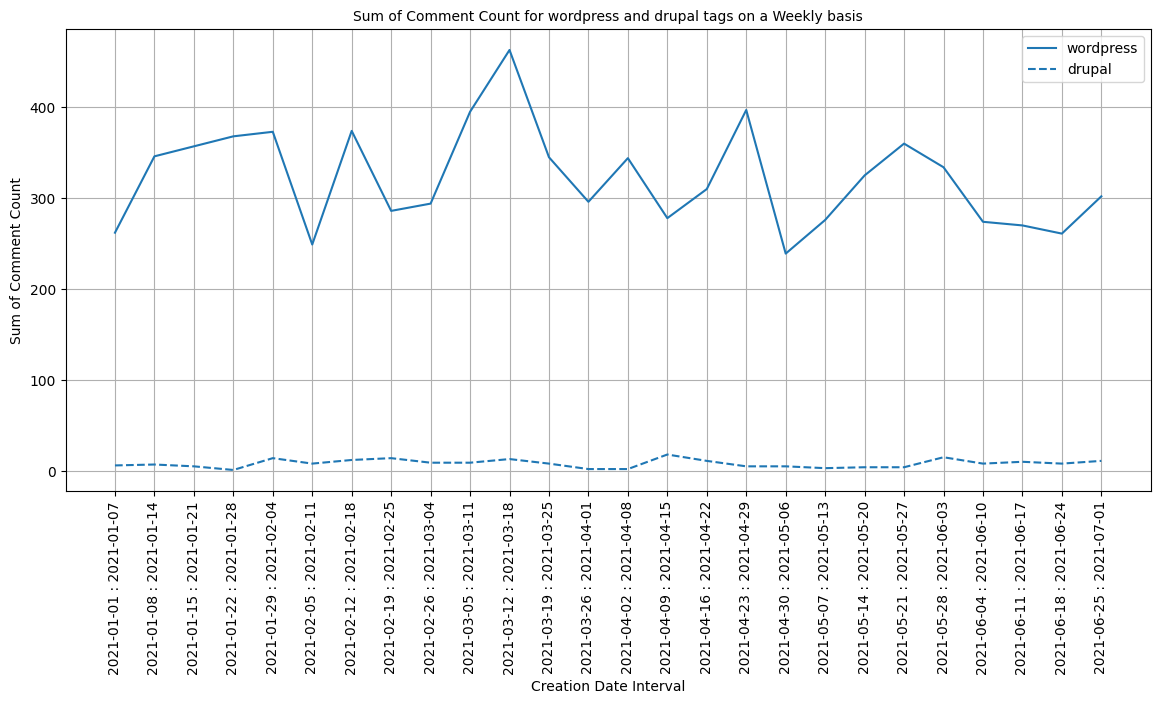

In [358]:
# Plot the  trend

matplotlib.style.use('default')
labelsize = 10
tag_list = result.columns.tolist()
x = result.index.tolist()

NUM_COLORS = len(tag_list)
LINE_STYLES = ['solid', 'dashed']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(14, 6)
for i in range(NUM_COLORS):
    lines = ax.plot(x,result[tag_list[i]],label=tag_list[i])
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.legend(fontsize=10)
plt.grid(True)
plt.title("Sum of Comment Count for wordpress and drupal tags on a Weekly basis", fontsize=labelsize)
plt.xlabel('Creation Date Interval',fontsize = labelsize)
plt.ylabel('Sum of Comment Count',fontsize = labelsize)
plt.show()
# plt.savefig('Comment Count Trend of 2 tags')

#### Conclusion
Based on the graph above, Wordpress has been receiving more Comment Count over the 6 months compared to Drupal may be because of the higher number of questions and answers posted for wordpress. For wordpress, the comment count shows high fluctuation in spikes throughout the Creation Date Intervals with no clear trend. For drupal, their is np proper trend over the given duration with its relative number remaining less than 50.

In [359]:
tag_list = ['wordpress', 'drupal']
result = pd.DataFrame()
date_string_list = []
for tag in tag_list:
    start_date = datetime.datetime(2021,1,1)
    end_date = datetime.datetime(2021,1,7)
    final_date = datetime.datetime(2021,7,1)
    temp = []
    while end_date <= final_date:
        start_date_string = start_date.strftime('%Y-%m-%d')
        end_date_string = end_date.strftime('%Y-%m-%d')
        date_string_list.append(start_date_string+" : "+end_date_string)
        if tag =='wordpress':
            temp.append(wordpress[(wordpress['creation_date'] >= start_date_string) & (wordpress['creation_date'] <= end_date_string)]['favorite_count'].sum())
        if tag =='drupal':
            temp.append(drupal[(drupal['creation_date'] >= start_date_string) & (drupal['creation_date'] <= end_date_string)]['favorite_count'].sum())
        start_date += relativedelta(days=+7)
        end_date += relativedelta(days=+7)
    result[tag] = temp
result.index = date_string_list[:len(date_string_list) // len(tag_list)]
result.fillna(0,inplace=True)
result=result.astype('int64')

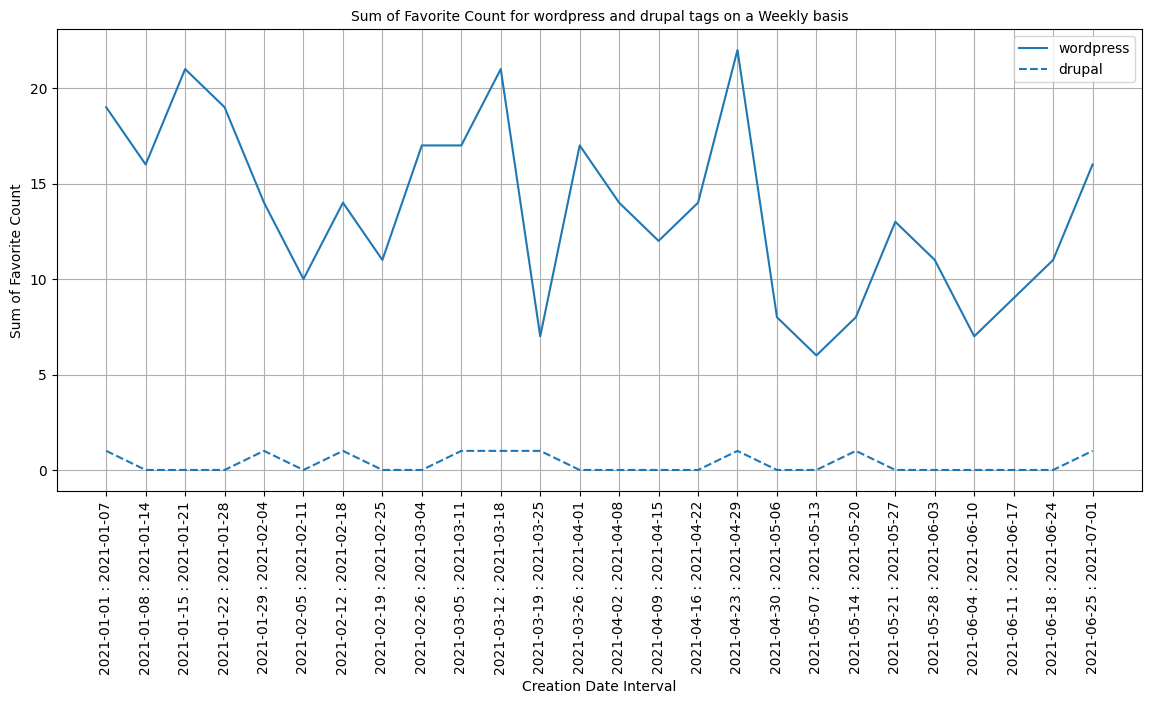

In [360]:
# Plot the  trend
matplotlib.style.use('default')
labelsize = 10
tag_list = result.columns.tolist()
x = result.index.tolist()

NUM_COLORS = len(tag_list)
LINE_STYLES = ['solid', 'dashed']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(14, 6)
for i in range(NUM_COLORS):
    lines = ax.plot(x,result[tag_list[i]],label=tag_list[i])
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.legend(fontsize=10)
plt.grid(True)
plt.title("Sum of Favorite Count for wordpress and drupal tags on a Weekly basis", fontsize=labelsize)
plt.xlabel('Creation Date Interval',fontsize = labelsize)
plt.ylabel('Sum of Favorite Count',fontsize = labelsize)
plt.show()
# plt.savefig('Favorite Count Trend of 2 tags')

#### Conclusion
Based on the graph above, Wordpress has been receiving more Favorite Count over the 6 months compared to Drupal. For wordpress, the Favorite count shows high fluctuation in spikes throughout the Creation Date Intervals with no clear trend. Similarly, in case of drupal, their is no proper trend over the given duration and its relative number remaining less than 5.

In [361]:
tag_list = ['wordpress', 'drupal']
result = pd.DataFrame()
date_string_list = []
for tag in tag_list:
    start_date = datetime.datetime(2021,1,1)
    end_date = datetime.datetime(2021,1,7)
    final_date = datetime.datetime(2021,7,1)
    temp = []
    while end_date <= final_date:
        start_date_string = start_date.strftime('%Y-%m-%d')
        end_date_string = end_date.strftime('%Y-%m-%d')
        date_string_list.append(start_date_string+" : "+end_date_string)
        if tag =='wordpress':
            temp.append(wordpress[(wordpress['creation_date'] >= start_date_string) & (wordpress['creation_date'] <= end_date_string)]['view_count'].sum())
        if tag =='drupal':
            temp.append(drupal[(drupal['creation_date'] >= start_date_string) & (drupal['creation_date'] <= end_date_string)]['view_count'].sum())
        start_date += relativedelta(days=+7)
        end_date += relativedelta(days=+7)
    result[tag] = temp
result.index = date_string_list[:len(date_string_list) // len(tag_list)]
result.fillna(0,inplace=True)
result=result.astype('int64')

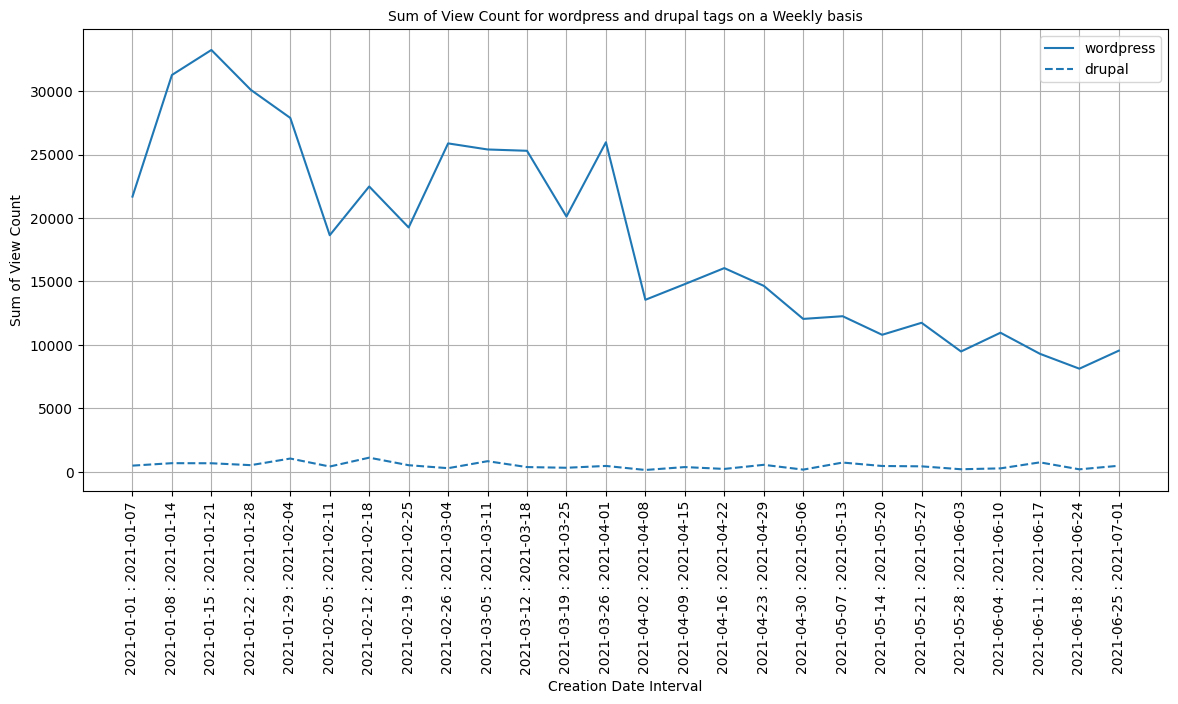

In [362]:
# Plot the  trend
matplotlib.style.use('default')
labelsize = 10
tag_list = result.columns.tolist()
x = result.index.tolist()

NUM_COLORS = len(tag_list)
LINE_STYLES = ['solid', 'dashed']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(14, 6)
for i in range(NUM_COLORS):
    lines = ax.plot(x,result[tag_list[i]],label=tag_list[i])
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.legend(fontsize=10)
plt.grid(True)
plt.title("Sum of View Count for wordpress and drupal tags on a Weekly basis", fontsize=labelsize)
plt.xlabel('Creation Date Interval',fontsize = labelsize)
plt.ylabel('Sum of View Count',fontsize = labelsize)
plt.show()
# plt.savefig('View Count Trend of 2 tags')

#### Conclusion
Based on the graph above, Wordpress has been receiving more View Count compared to Drupal over the Creation Date intervals. Overall, the View count of wordpress shows a downward trend throughout the intervals. However, in case of drupal, their is no proper trend over the given time intervals and its relative value remaining less than 2000.

In [363]:
tag_list = ['wordpress', 'drupal']
result = pd.DataFrame()
date_string_list = []
for tag in tag_list:
    start_date = datetime.datetime(2021,1,1)
    end_date = datetime.datetime(2021,1,7)
    final_date = datetime.datetime(2021,7,1)
    temp = []
    while end_date <= final_date:
        start_date_string = start_date.strftime('%Y-%m-%d')
        end_date_string = end_date.strftime('%Y-%m-%d')
        date_string_list.append(start_date_string+" : "+end_date_string)
        if tag =='wordpress':
            temp.append(wordpress[(wordpress['creation_date'] >= start_date_string) & (wordpress['creation_date'] <= end_date_string)]['score'].sum())
        if tag =='drupal':
            temp.append(drupal[(drupal['creation_date'] >= start_date_string) & (drupal['creation_date'] <= end_date_string)]['score'].sum())
        start_date += relativedelta(days=+7)
        end_date += relativedelta(days=+7)
    result[tag] = temp
result.index = date_string_list[:len(date_string_list) // len(tag_list)]
result.fillna(0,inplace=True)
result=result.astype('int64')

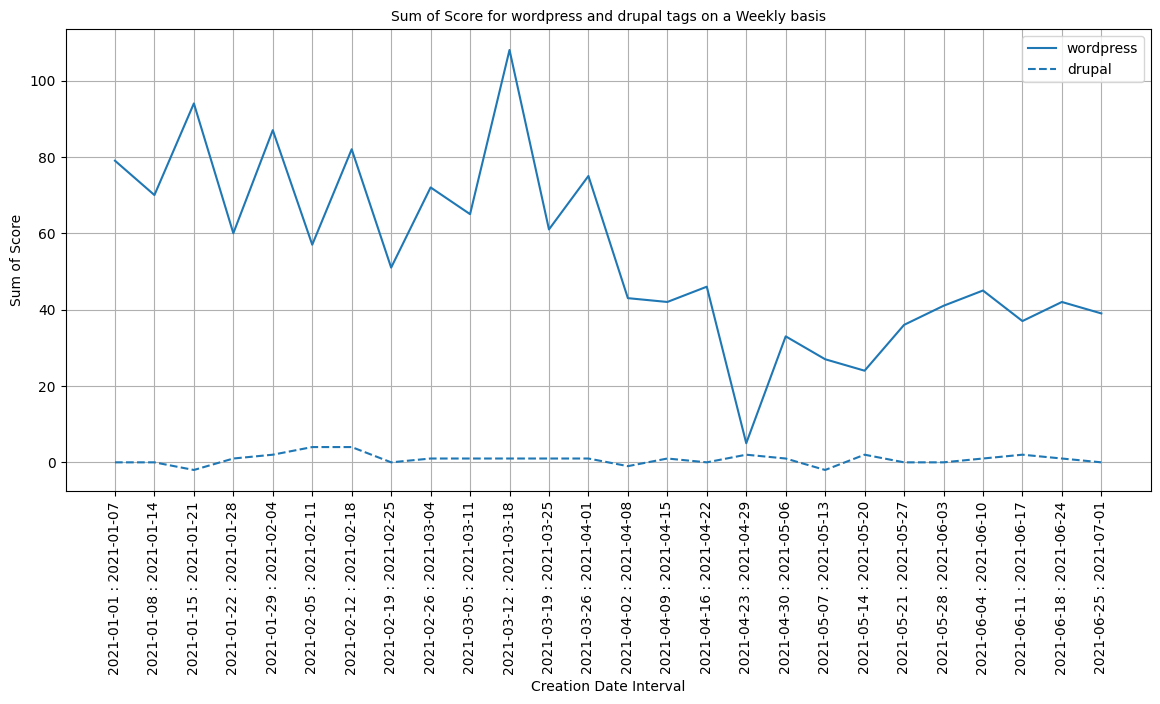

In [364]:
# Plot the  trend
matplotlib.style.use('default')
labelsize = 10
tag_list = result.columns.tolist()
x = result.index.tolist()

NUM_COLORS = len(tag_list)
LINE_STYLES = ['solid', 'dashed']
NUM_STYLES = len(LINE_STYLES)

cm = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(14, 6)
for i in range(NUM_COLORS):
    lines = ax.plot(x,result[tag_list[i]],label=tag_list[i])
    lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.legend(fontsize=10)
plt.grid(True)
plt.title("Sum of Score for wordpress and drupal tags on a Weekly basis", fontsize=labelsize)
plt.xlabel('Creation Date Interval',fontsize = labelsize)
plt.ylabel('Sum of Score',fontsize = labelsize)
plt.show()
# plt.savefig('Score Trend of 2 tags')

#### Conclusion
Based on the graph above, Wordpress has been receiving more Score compared to Drupal over the Creation Date intervals. Overall, the Score count of wordpress shows a sharp downward trend between 23rd to 29th April,2021 and afterwards followed a upward trend. However, in case of drupal, their is no proper trend over the given time intervals and its relative number varyies between -2 and 4.